In [1]:
 

import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

 

import os
for dirname, _, filenames in os.walk(''): 
    for filename in filenames:
        print(os.path.join(dirname, filename))


Loading and Observing the Dataset

In [2]:
df = pd.read_csv('emails.csv')

#### df.head()

In [3]:
df.shape

(5728, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


No Missing Values


In [5]:
df.isna().sum()

text    0
spam    0
dtype: int64

**Exploratory Data Analysis**

In [6]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

C:\Users\Root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

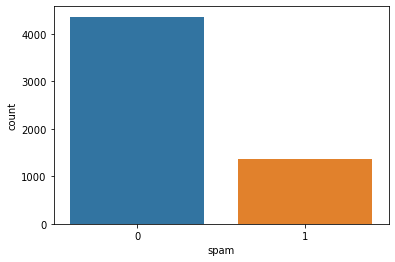

In [7]:
sns.countplot(df['spam'])

Checking the Length of email and it's relation

In [8]:
from nltk import word_tokenize

Function that tokenizes each and every email into words and returns it's length

In [9]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)

Applying the function to df['text'] and storing the count in another column

In [10]:
df['count']=df['text'].apply(count_words)

In [11]:
df['count']

0       325
1        90
2        88
3        99
4        53
       ... 
5723    298
5724    245
5725    516
5726    277
5727    445
Name: count, Length: 5728, dtype: int64

In [12]:
df.groupby('spam')['count'].mean()

spam
0    346.835321
1    267.896199
Name: count, dtype: float64

# Text Prepreocessing

**Function to Process the text data and 1. Remove Punctuation 2.Stop Words 3.Stemming**

In [13]:
import string
from nltk.corpus import stopwords


In [14]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [15]:
import nltk

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Root\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['text']=df['text'].apply(process_text)

In [ ]:
import nltk

In [ ]:
df['text']

**After cleaning the text. We will now carry out the process of Stemming to reduce infected words to their root**

In [40]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [19]:
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [ ]:
df['text']=df['text'].apply(stemming)

In [ ]:
df.head()

**Now we will use Count Vectorizer to convert string data into Bag of Words ie Known Vocabulary**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df['text'])

In [27]:
#print(vectorizer.get_feature_names())
#print(message_bow.toarray())

**Splitting the Data[](http://)**

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message_bow,df['spam'],test_size=0.20)

# Creating the Model and it's Evaluation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(nb,X_test,y_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,message_bow,df['spam'],cv=kfold,scoring="accuracy"))*100," %")